# DATANEXUS - Proyecto academico

Datanexus es un gestor de datos para un concesionario de carros.

Creado por: 

Alvaro José Osuna López

Sebastian Salas Salazar

Alejandra Cano Espinosa

## Diagrama de clase
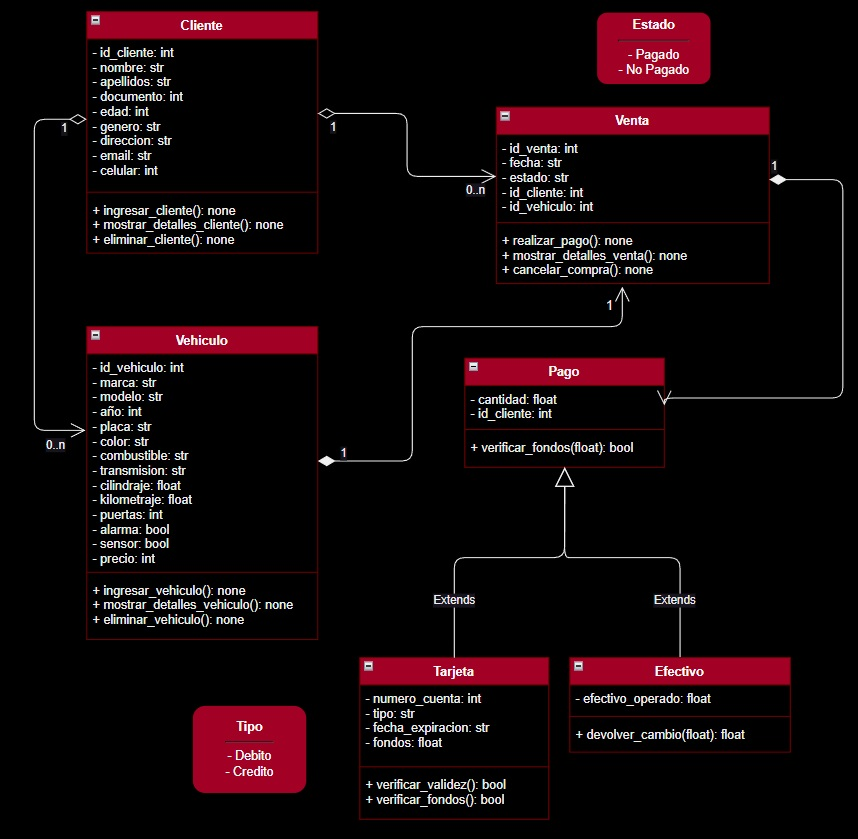


## Requerimientos
R1: Registro de vehículos.

R2: Registro de clientes interesados.

R3: Registro de las ventas realizadas.

R4: Almacenamiento y manejo del registro de clientes interesados por
medio de una base de datos (archivo clientes.json).

R5: Almacenamiento y manejo del inventario de vehículos por medio de
una base de datos (archivo vehiculos.json).

R6: Almacenamiento y manejo del inventario de las ventas realizadas por
medio de una base de datos (archivo ventas.json).

R7: Generación de facturas de ventas con información del cliente y el
vehículo.

R8: Filtrar por atributos en la base de datos de vehículos.

R9: Elección del método de pago de preferencia (débito o crédito).

R10: Verificación de la validez o estado de la tarjeta en caso de pago con
tarjeta.

R11: Devolución del cambio en efectivo de acuerdo al pago del vehículo.

R12: Verificación de fondos del cliente para realizar el pago.


In [11]:
import json
import re
from datetime import datetime as dt

In [12]:
class Cliente:

    def __init__(
        self,
        id_cliente=None,
        nombre=None,
        apellidos=None,
        documento=None,
        edad=None,
        genero=None,
        direccion=None,
        email=None,
        celular=None,
    ):
        with open("./cliente.json", "r", encoding="utf-8") as archivo:
            clientes = json.load(archivo)
            if id_cliente is not None:
                self._id_cliente = id_cliente
            elif not clientes and (id_cliente is None):
                self._id_cliente = 0
            else:
                self._id_cliente = clientes[-1]["_id_cliente"] + 1
        self._nombre = nombre
        self._apellidos = apellidos
        self._documento = documento
        self._edad = edad
        self._genero = genero
        self._direccion = direccion
        self._email = email
        self._celular = celular

    @property
    def edad(self):
        return self._edad

    @edad.setter
    def edad(self, value):
        if 0 < value < 120:
            self._edad = value
        else:
            raise ValueError("La edad debe estar entre 1 y 119 años.")

    @property
    def genero(self):
        return self._genero

    @genero.setter
    def genero(self, value):
        if value.lower() in ["masculino", "femenino"]:
            self._genero = value.lower().capitalize()
        else:
            raise ValueError("El género debe ser 'Masculino' o 'Femenino'.")

    @property
    def email(self):
        return self._email

    @email.setter
    def email(self, value):
        if re.match(r"^\w+@\w+\.\w{2,3}$", value):
            self._email = value
        else:
            raise ValueError("El correo electrónico no es válido.")

    @property
    def celular(self):
        return self._celular

    @celular.setter
    def celular(self, value):
        if re.match(r"^\d{10}$", str(value)):
            self._celular = value
        else:
            raise ValueError("El número de celular debe tener 10 dígitos.")

    def ingresar_cliente(self):
        print("-" * 30)
        print("INGRESAR DATOS DEL CLIENTE:")
        self._nombre = input("Ingrese los nombres del cliente: \n")
        self._apellidos = input("Ingrese los apellidos del cliente: \n")
        self._documento = int(input("Ingrese el numero de documento del cliente: \n"))
        self._edad = int(input("Ingrese la edad del cliente: \n"))
        self._genero = input("Ingrese el genero del cliente : (Masculino/Femenino): \n")
        self._direccion = input("Ingrese la dirección del cliente: \n")
        self._email = input(
            "Ingrese la direccion de correo electronico del cliente: \n"
        )
        self._celular = int(input("Ingrese el número de celular del cliente: \n"))

    def mostrar_detalles_cliente(self):
        print("/", "-" * 30, "/")
        print("DETALLES DEL CLIENTE:")
        print("ID del Cliente:", self._id_cliente)
        print("Nombre:", self._nombre)
        print("Apellidos:", self._apellidos)
        print("Documento:", self._documento)
        print("Edad:", self.edad)
        print("Género:", self.genero)
        print("Dirección:", self._direccion)
        print("Email:", self._email)
        print("Celular:", self._celular)


def agregar_cliente():
    cliente = Cliente()
    cliente.ingresar_cliente()
    guardar_cliente(cliente)
    print("Cliente agregado exitosamente.")


def mostrar_todos_los_clientes(filename="./cliente.json"):
    with open(filename, "r", encoding="utf-8") as archivo:
        clientes = json.load(archivo)
        if not clientes:
            print("No hay ningún cliente registrado.")
            return
        for cliente in clientes:
            nuevo_cliente = Cliente(
                id_cliente=cliente["_id_cliente"],
                nombre=cliente["_nombre"],
                apellidos=cliente["_apellidos"],
                documento=cliente["_documento"],
                edad=cliente["_edad"],
                genero=cliente["_genero"],
                direccion=cliente["_direccion"],
                email=cliente["_email"],
                celular=cliente["_celular"],
            )
            nuevo_cliente.mostrar_detalles_cliente()


def guardar_cliente(cliente, filename="./cliente.json"):
    with open(filename, "r+", encoding="utf-8") as archivo:
        try:
            archivo_datos = json.load(archivo)
        except json.JSONDecodeError:
            archivo_datos = []
        archivo_datos.append(cliente.__dict__)
        archivo.seek(0)
        json.dump(archivo_datos, archivo, indent=4)


def eliminar_cliente(filename="./cliente.json"):
    with open(filename, "r", encoding="utf-8") as f:
        clientes = json.load(f)
        if not clientes:
            print("No hay ningún cliente registrado para borrar.")
            return

        id_cliente = int(input("Ingrese la ID del cliente que desea eliminar: "))

        confirmacion = input(
            "¿Está seguro de que desea borrar este cliente? (s/n): "
        ).lower()

        if confirmacion == "s":
            for idx, obj in enumerate(clientes):
                if obj["_id_cliente"] == id_cliente:
                    clientes.pop(idx)
                    print("Cliente borrado exitosamente.")
                    break
            else:
                print("Cliente no encontrado.")
        else:
            print("Operación cancelada.")

        with open(filename, "w", encoding="utf-8") as f:
            json.dump(clientes, f, indent=4)

In [13]:
class Vehiculo:

    def __init__(
        self,
        id_vehiculo=None,
        marca=None,
        modelo=None,
        anio=None,
        placa=None,
        color=None,
        combustible=None,
        transmision=None,
        cilindraje=None,
        kilometraje=None,
        puertas=None,
        alarma=bool,
        sensor=bool,
        precio=None,
    ):
        with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
            vehiculos = json.load(archivo)
            if id_vehiculo is not None:
                self._id_vehiculo = id_vehiculo
            elif not vehiculos and (id_vehiculo is None):
                self._id_vehiculo = 0
            else:
                self._id_vehiculo = vehiculos[-1]["_id_vehiculo"] + 1
        self._marca = marca
        self._modelo = modelo
        self._anio = anio
        self._placa = placa
        self._color = color
        self._combustible = combustible
        self._transmision = transmision
        self._cilindraje = cilindraje
        self._kilometraje = kilometraje
        self._puertas = puertas
        self._alarma = alarma
        self._sensor = sensor
        self._precio = precio

    @property
    def marca(self):
        return self._marca

    @marca.setter
    def marca(self, value):
        self._marca = value

    @property
    def modelo(self):
        return self._modelo

    @modelo.setter
    def modelo(self, value):
        self._modelo = value

    @property
    def anio(self):
        return self._anio

    @anio.setter
    def anio(self, value):
        current_year = dt.now().year
        if value is not None:
            if 1800 <= value <= current_year:
                self._anio = value
            else:
                raise ValueError(f"El año debe estar entre 1900 y {current_year}.")
        else:
            self._anio = value

    @property
    def placa(self):
        return self._placa

    @placa.setter
    def placa(self, value):
        if not re.match(r"\w{3}-\d{3}", value):
            raise ValueError("La placa debe estar en formato aaa-000")
        else:
            self._placa = value

    @property
    def color(self):
        return self._color

    @color.setter
    def color(self, value):
        self._color = value

    @property
    def combustible(self):
        return self._combustible

    @combustible.setter
    def combustible(self, value):
        tipos_validos_combustible = {"gasolina", "diesel", "electrica"}
        if value.lower() in tipos_validos_combustible:
            self._combustible = value.lower()
        else:
            raise ValueError(
                f"Tipo de combustible '{value}' no es válido. Debe ser 'gasolina', 'diésel' o 'eléctrica'."
            )

    @property
    def transmision(self):
        return self._transmision

    @transmision.setter
    def transmision(self, value):
        tipos_validos = {"manual", "automatica", "semiautomatica", "cvt"}
        if value.lower() in tipos_validos:
            self._transmision = value.lower()
        else:
            raise ValueError(
                f"Tipo de transmisión '{value}' no es válido. Debe ser 'manual', 'automatica', 'semiautomatica' o 'cvt'."
            )

    @property
    def cilindraje(self):
        return self._cilindraje

    @cilindraje.setter
    def cilindraje(self, value):
        if not isinstance(value, (int, float)):
            raise ValueError("El cilindraje debe ser un número (entero o decimal)")
        if value <= 0 or value > 8.0:
            raise ValueError(
                "El cilindraje debe ser un número positivo y razonable (por ejemplo, entre 0.5L y 8.0L)"
            )
        else:
            self._cilindraje = value

    @property
    def kilometraje(self):
        return self._kilometraje

    @kilometraje.setter
    def kilometraje(self, value):
        if not isinstance(value, (int, float)) or value < 0 or value > 200000:
            raise ValueError(
                "El kilometraje debe ser un número entero no negativo que debe estar entre cero y 2000 km."
            )
        else:
            self._kilometraje = value

    @property
    def puertas(self):
        return self._puertas

    @puertas.setter
    def puertas(self, value):
        if value is not None:
            if 0 < value <= 5:
                self._puertas = value
            else:
                raise ValueError("el numero de puertas debe ser inferior a 5.")
        else:
            self._puertas = value

    @property
    def alarma(self):
        return self._alarma

    @alarma.setter
    def alarma(self, value):
        if value.lower() == "si":
            self._alarma = True
        elif value.lower() == "no":
            self._alarma = False
        else:
            raise ValueError("Valor para alarma debe ser 'si' o 'no'.")

    @property
    def sensor(self):
        return self._sensor

    @sensor.setter
    def sensor(self, value):
        if value.lower() == "si":
            self._sensor = True
        elif value.lower() == "no":
            self._sensor = False
        else:
            raise ValueError("Valor para sensor debe ser 'si' o 'no'.")

    @property
    def precio(self):
        return self._precio

    @precio.setter
    def precio(self, value):
        if not isinstance(value, (int)) or value < 0:
            raise ValueError(
                "El precio debe ser un numero entero mayor a cero, en formato (000_000_000_000)."
            )
        else:
            self._precio = value

    def ingresar_vehiculo(self):
        print("-" * 30)
        print("INGRESAR DATOS DEL VEHICULO:")
        self.marca = input("Ingrese la marca del vehiculo: \n")
        self.modelo = input("Ingrese el modelo del vehiculo: \n")
        self.anio = int(input("Ingrese el año del vehiculo: \n"))
        self.placa = input("Ingrese la placa del vehiculo: \n")
        self.color = input("Ingrese el color del vehiculo: \n")
        self.combustible = input(
            "Ingrese el tipo de combustible del vehiculo \n (gasolina, diesel, electrica): \n"
        )
        self.transmision = input(
            "Ingrese el tipo de transmision del vehiculo \n (Manual, Automatica, CVT, Semiautomatica): \n"
        )
        self.cilindraje = float(
            input(
                "Ingrese el cilindraje del vehiculo \n(El cilindraje debe ser un número (entero o decimal entre 1 y 8.0)): \n"
            )
        )
        self.kilometraje = float(input("Ingrese el kilometraje del vehiculo: \n"))
        self.puertas = int(input("Ingrese el numero de puertas del vehiculo: \n"))
        self.alarma = input("¿El vehiculo tiene alarma? (si/no): \n")
        self.sensor = input("¿El vehiculo tiene sensores? (si/no): \n")
        self.precio = int(input("Ingrese el precio del vehiculo: \n"))

    def mostrar_detalles_vehiculo(self):
        print("-" * 30)
        print("DETALLES DEL VEHICULO")
        print("El id del vehiculo es: ", self._id_vehiculo)
        print("La marca del vehiculo es: ", self._marca)
        print("El modelo del vehiculo es: ", self._modelo)
        print("El año del vehiculo es: ", self._anio)
        print("La placa del vehiculo es: ", self._placa)
        print("El color del vehiculo es: ", self._color)
        print("El tipo de combustible que utiliza el vehiculo es: ", self._combustible)
        print("El tipo de transmision del vehiculo es: ", self._transmision)
        print("el cilindraje del vehiculo es: ", self._cilindraje)
        print("El kilometraje del vehiculo es: ", self._kilometraje, "km/h")
        print("El vehiculo tiene ", self._puertas, "puertas")
        print("El vehiculo cuenta con alarma ", self._alarma)
        print("El vehiculo cuenta con sensor ", self._sensor)
        print("El vehiculo tiene un valor de ", self._precio, "pesos")


def agregar_vehiculo():
    vehiculo = Vehiculo()
    vehiculo.ingresar_vehiculo()
    guardar_vehiculo(vehiculo)
    print("Vehiculo agregado exitosamente.")


def mostrar_todos_los_vehiculos(filename="./vehiculo.json"):
    with open(filename, "r", encoding="utf-8") as archivo:
        vehiculos = json.load(archivo)
        if not vehiculos:
            print("No hay ningún vehiculo registrado.")
            return
    for vehiculo in vehiculos:
        nuevo_vehiculo = Vehiculo(
            id_vehiculo=vehiculo["_id_vehiculo"],
            marca=vehiculo["_marca"],
            modelo=vehiculo["_modelo"],
            anio=vehiculo["_anio"],
            placa=vehiculo["_placa"],
            color=vehiculo["_color"],
            combustible=vehiculo["_combustible"],
            transmision=vehiculo["_transmision"],
            cilindraje=vehiculo["_cilindraje"],
            kilometraje=vehiculo["_kilometraje"],
            puertas=vehiculo["_puertas"],
            alarma=vehiculo["_alarma"],
            sensor=vehiculo["_sensor"],
            precio=vehiculo["_precio"],
        )
        nuevo_vehiculo.mostrar_detalles_vehiculo()


def guardar_vehiculo(vehiculo, filename="./vehiculo.json"):
    with open(filename, "r+", encoding="utf-8") as archivo:
        try:
            archivo_datos = json.load(archivo)
        except json.JSONDecodeError:
            archivo_datos = []
        archivo_datos.append(vehiculo.__dict__)
        archivo.seek(0)
        json.dump(archivo_datos, archivo, indent=4)


def eliminar_vehiculo(filename="./vehiculo.json"):
    with open(filename, "r", encoding="utf-8") as f:
        vehiculos = json.load(f)
        if not vehiculos:
            print("No hay ningún vehiculo registrado para borrar.")
            return

    id_vehiculo = int(input("Ingrese la ID del vehiculo que desea eliminar: "))

    confirmacion = input(
        "¿Está seguro de que desea borrar este vehiculo? (s/n): "
    ).lower()

    if confirmacion == "s":
        for idx, obj in enumerate(vehiculos):
            if obj["_id_vehiculo"] == id_vehiculo:
                vehiculos.pop(idx)
                print("Vehiculo borrado exitosamente.")
                break
        else:
            print("Vehiculo no encontrado.")
    else:
        print("Operación cancelada.")

    with open(filename, "w", encoding="utf-8") as f:
        json.dump(vehiculos, f, indent=4)

In [14]:
class Venta:
    _id_venta = int
    _fecha = str
    _estado = str
    _id_cliente = int
    _id_vehiculo = int

    def __init__(
        self, id_venta=None, fecha=None, estado=None, id_cliente=None, id_vehiculo=None
    ):
        with open("./venta.json", "r", encoding="utf-8") as archivo:
            ventas = json.load(archivo)
            if id_venta is not None:
                self._id_venta = id_venta
            elif not ventas and (id_venta is None):
                self._id_venta = 0
            else:
                self._id_venta = ventas[-1]["_id_venta"] + 1

        if fecha is not None:
            self._fecha = fecha
        else:
            self._fecha = dt.now().strftime("%d-%m-%Y")

        if estado is not None:
            self._estado = estado
        else:
            self._estado = "No pagado"

        self._id_cliente = id_cliente
        self._id_vehiculo = id_vehiculo

    @property
    def id_venta(self):
        return self._id_venta

    @property
    def fecha(self):
        return self._fecha

    @fecha.setter
    def fecha(self, value):
        if not re.match(r"\d{2}-\d{2}-\d{4}", value):
            raise ValueError("La fecha debe estar en formato dd-mm-yyyy")
        else:
            self._fecha = value

    @property
    def id_cliente(self):
        return self._id_cliente

    @id_cliente.setter
    def id_cliente(self, value):
        self._id_cliente = value

    @property
    def id_vehiculo(self):
        return self._id_vehiculo

    @id_vehiculo.setter
    def id_vehiculo(self, value):
        self._id_vehiculo = value

    def realizar_pago(self, filename="./venta.json"):
        validez_pago = registrar_pago(self._id_cliente, self.id_vehiculo)
        if validez_pago:
            with open(filename, "r", encoding="utf-8") as archivo:
                ventas = json.load(archivo)
                for venta in ventas:
                    if venta["_id_venta"] == self.id_venta:
                        venta["_estado"] = "Pagado"
            with open(filename, "w", encoding="utf-8") as f:
                json.dump(ventas, f, indent=4)
            eliminar_vehiculo_automaticamente(
                self._id_vehiculo, filename="./vehiculo.json"
            )

    def mostrar_detalles_venta(self):
        with open("./cliente.json", "r", encoding="utf-8") as archivo:
            clientes = json.load(archivo)
            for cliente in clientes:
                if cliente["_id_cliente"] == self.id_cliente:
                    cliente_info = cliente
        with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
            vehiculos = json.load(archivo)
            for vehiculo in vehiculos:
                if vehiculo["_id_vehiculo"] == self.id_vehiculo:
                    vehiculo_info = vehiculo
        print(
            f"""\n
                Cliente: {cliente_info["_nombre"]} {cliente_info["_apellidos"]}
                Vehiculo: {vehiculo_info["_marca"]} {vehiculo_info["_modelo"]}
                Fecha: {self._fecha}
                Estado: {self._estado}
                Por la suma total de: {vehiculo_info["_precio"]} pesos
            """
        )

    def cancelar_compra(self, filename="./venta.json"):
        with open(filename, "r", encoding="utf-8") as f:
            ventas = json.load(f)

            id_venta = self._id_venta

            confirmacion = input(
                "¿Está seguro de que desea cancelar su compra? (s/n): "
            ).lower()

            if confirmacion == "s":
                for idx, obj in enumerate(ventas):
                    if obj["_id_venta"] == id_venta:
                        ventas.pop(idx)
                        print("Compra cancelada exitosamente.")
                        break
            else:
                print("Operación cancelada.")

            with open(filename, "w", encoding="utf-8") as f:
                json.dump(ventas, f, indent=4)


def identificar_cliente():
    with open("./cliente.json", "r", encoding="utf-8") as archivo:
        clientes = json.load(archivo)
        if not clientes:
            print("No hay ningún cliente registrado.")
            return
        for cliente in clientes:
            while True:
                doc = int(input("Ingrese su numero de documento:\n"))
                cliente = next(
                    (c for c in clientes if c["_documento"] == doc),
                    None,
                )
                if cliente is None:
                    print("Cliente no encontrado.")
                    continue
                if cliente["_documento"] == doc:
                    es_cliente = input(
                        f'¿Esta seguro que se identifica como {cliente["_nombre"]} {cliente["_apellidos"]}? (Si/No)\n'
                    )
                    if es_cliente.lower() == "si":
                        id_cliente_seleccionado = cliente["_id_cliente"]
                        print("Cliente identificado exitosamente.")
                        return id_cliente_seleccionado
                    else:
                        continue


def mostrar_vehiculos_disponibles(
    marca=None, modelo=None, anio=None, precio=None, opcion=None
):
    if opcion is not None:
        filtro_valor = next(f for f in [marca, modelo, anio, precio] if f != None)
        if opcion == "anio" or opcion == "precio":
            filtro_valor = int(filtro_valor)
        with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
            vehiculos = json.load(archivo)
            if not vehiculos:
                print("No hay ningún vehiculo disponible.")
                return
            flag = True
            for vehiculo in vehiculos:
                if opcion == "precio":
                    if vehiculo[f"_{opcion}"] <= filtro_valor:
                        print("-" * 50)
                        print(f'[{vehiculo["_id_vehiculo"]}] \t')
                        print(f'{vehiculo["_marca"]} {vehiculo["_modelo"]}')
                        print(f'{vehiculo["_kilometraje"]} km | {vehiculo["_anio"]}')
                        print(f'{vehiculo["_precio"]} pesos')
                        print("-" * 50)
                        flag = False
                else:
                    if vehiculo[f"_{opcion}"] == filtro_valor:
                        print("-" * 50)
                        print(f'[{vehiculo["_id_vehiculo"]}] \t')
                        print(f'{vehiculo["_marca"]} {vehiculo["_modelo"]}')
                        print(f'{vehiculo["_kilometraje"]} km | {vehiculo["_anio"]}')
                        print(f'{vehiculo["_precio"]} pesos')
                        print("-" * 50)
                        flag = False
            if flag:
                print("No se encontraron vehiculos disponibles que cumplan su filtro")
                seleccionar_vehiculo()
    else:
        with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
            vehiculos = json.load(archivo)
            if not vehiculos:
                print("No hay ningún vehiculo disponible.")
                return
            for vehiculo in vehiculos:
                print("-" * 50)
                print(f'[{vehiculo["_id_vehiculo"]}] \t')
                print(f'{vehiculo["_marca"]} {vehiculo["_modelo"]}')
                print(f'{vehiculo["_kilometraje"]} km | {vehiculo["_anio"]}')
                print(f'{vehiculo["_precio"]} pesos')
                print("-" * 50)


def seleccionar_vehiculo():
    print("\nSeleccione el filtro:")
    print("0. Todos los vehiculos")
    print("1. Marca")
    print("2. Modelo")
    print("3. Año")
    print("4. Precio")
    filtro = int(input("Ingrese el numero a la opcion correspondiente: \n"))
    if filtro == 0:
        mostrar_vehiculos_disponibles()
    elif filtro == 1:
        opcion = "marca"
        filtro_valor = input(f"Ingrese valor de {opcion} que desea visualizar: \n")
        mostrar_vehiculos_disponibles(marca=filtro_valor, opcion=opcion)
    elif filtro == 2:
        opcion = "modelo"
        filtro_valor = input(f"Ingrese valor de {opcion} que desea visualizar: \n")
        mostrar_vehiculos_disponibles(modelo=filtro_valor, opcion=opcion)
    elif filtro == 3:
        opcion = "anio"
        filtro_valor = input(f"Ingrese valor de {opcion} que desea visualizar: \n")
        mostrar_vehiculos_disponibles(anio=filtro_valor, opcion=opcion)
    elif filtro == 4:
        opcion = "precio"
        filtro_valor = input(
            f"Ingrese valor máximo de {opcion} que desea visualizar: \n"
        )
        mostrar_vehiculos_disponibles(precio=filtro_valor, opcion=opcion)
    else:
        print("Opcion no valida. Por favor, intente de nuevo")
        return

    with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
        vehiculos = json.load(archivo)
        while True:
            id_vehiculo_seleccionado = int(
                input("Ingrese el id correspondiente al vehiculo deseado: \n")
            )
            vehiculo = next(
                (v for v in vehiculos if v["_id_vehiculo"] == id_vehiculo_seleccionado),
                None,
            )
            with open("./venta.json", "r", encoding="utf-8") as archivo:
                ventas = json.load(archivo)
                venta = next(
                    (
                        v
                        for v in ventas
                        if v["_id_vehiculo"] == id_vehiculo_seleccionado
                    ),
                    None,
                )
            if vehiculo is None:
                print("Vehiculo no encontrado.")
                continue
            elif venta is not None:
                print("El vehiculo ya se encuentra en una transaccion.")
                continue
            else:
                print("Vehiculo seleccionado exitosamente.")
                return id_vehiculo_seleccionado


def eliminar_vehiculo_automaticamente(id_vehiculo, filename="./vehiculo.json"):
    with open(filename, "r", encoding="utf-8") as f:
        vehiculos = json.load(f)
        if not vehiculos:
            print("No hay ningún vehiculo registrado para borrar.")
            return

    for idx, obj in enumerate(vehiculos):
        if obj["_id_vehiculo"] == id_vehiculo:
            vehiculos.pop(idx)
            print("Vehiculo borrado exitosamente.")
            break
    else:
        print("Vehiculo no encontrado.")

    with open(filename, "w", encoding="utf-8") as f:
        json.dump(vehiculos, f, indent=4)


def guardar_venta(venta, filename="./venta.json"):
    with open(filename, "r+", encoding="utf-8") as archivo:
        ventas = json.load(archivo)
        ventas.append(venta.__dict__)
        archivo.seek(0)
        json.dump(ventas, archivo, indent=4)


class Pago:
    def __init__(self, cantidad, id_cliente):
        self.cantidad = cantidad
        self.id_cliente = id_cliente

    def verificar_fondos(self):
        raise NotImplementedError("Este método debe ser implementado por las subclases")

    def obtener_cliente(self):
        with open("./cliente.json", "r", encoding="utf-8") as archivo:
            clientes = json.load(archivo)
            for cliente in clientes:
                if cliente["_id_cliente"] == self.id_cliente:
                    return cliente
        return None


class Tarjeta(Pago):
    def __init__(
        self,
        cantidad,
        id_cliente,
        nro_cuenta,
        tipo,
        fecha_expiracion,
        fondos,
        contraseña,
    ):
        super().__init__(cantidad, id_cliente)
        self.nro_cuenta = nro_cuenta
        self.tipo = tipo
        self.fecha_expiracion = fecha_expiracion
        self.fondos = fondos
        self.contraseña = contraseña

    def verificar_validez(self):
        # Verificar longitud del número de tarjeta (debe ser 16 dígitos)
        if not re.match(r"^\d{16}$", str(self.nro_cuenta)):
            print("El número de tarjeta no es válido. Debe tener 16 dígitos.")
            return False

        # Verificar la fecha de expiración
        try:
            fecha_expiracion_dt = dt.strptime(self.fecha_expiracion, "%m-%Y")
            if fecha_expiracion_dt < dt.now():
                print("La tarjeta está expirada.")
                return False
        except ValueError:
            print("La fecha de expiración no tiene un formato válido (MM-AAAA).")
            return False

        return True

    def verificar_fondos(self):
        return self.fondos >= self.cantidad


class Efectivo(Pago):
    def __init__(self, cantidad, id_cliente, efectivo_operado):
        super().__init__(cantidad, id_cliente)
        self.efectivo_operado = efectivo_operado

    def devolver_cambio(self):
        if self.efectivo_operado >= self.cantidad:
            return self.efectivo_operado - self.cantidad
        else:
            raise ValueError(
                "El efectivo operado no es suficiente para realizar el pago"
            )


def registrar_pago(id_cliente, id_vehiculo):
    # Verificar si el cliente existe
    with open("./cliente.json", "r", encoding="utf-8") as archivo:
        clientes = json.load(archivo)
        cliente = next((c for c in clientes if c["_id_cliente"] == id_cliente), None)

    if cliente is None:
        print("Cliente no encontrado.")
        return False

    with open("./vehiculo.json", "r", encoding="utf-8") as archivo:
        vehiculos = json.load(archivo)
        vehiculo = next(
            (v for v in vehiculos if v["_id_vehiculo"] == id_vehiculo), None
        )

    if vehiculo is None:
        print("Vehiculo no encontrado.")
        return False

    print(f"\nCliente seleccionado: {cliente['_nombre']} {cliente['_apellidos']}")
    print("\nSeleccione el método de pago:")
    print("1. Tarjeta")
    print("2. Efectivo")
    metodo_pago = input("Ingrese la opción de pago: ")

    cantidad = vehiculo["_precio"]
    if metodo_pago == "1":
        nro_cuenta = input("Número de cuenta (16 dígitos): ")
        if metodo_pago == "1":
            print("Seleccione el tipo de tarjeta:")
            print("1. Débito")
            print("2. Crédito")
            tipo_tarjeta = input("Ingrese el tipo de tarjeta: ")

        if tipo_tarjeta == "1":
            tipo = "Débito"
        elif tipo_tarjeta == "2":
            tipo = "Crédito"
        else:
            print("Tipo de tarjeta no válido.")
            return False
        fecha_expiracion = input("Fecha de expiración (MM-AAAA): ")

        while True:
            contraseña = input("Ingrese su contraseña (Debe ser de 3 digitos): ")
            if contraseña.isdigit() and len(contraseña) == 3:
                break
            else:
                print("Error: La contraseña debe de contener 3 digitos númericos.")
        fondos = float(input("Fondos disponibles en la tarjeta: "))

        pago_tarjeta = Tarjeta(
            cantidad, id_cliente, nro_cuenta, tipo, fecha_expiracion, fondos, contraseña
        )

        if pago_tarjeta.verificar_validez():
            if pago_tarjeta.verificar_fondos():
                pago_tarjeta.fondos = pago_tarjeta.fondos - vehiculo["_precio"]
                print(
                    f"Pago con tarjeta realizado con éxito. Sus saldo restante es de: {pago_tarjeta.fondos} pesos"
                )
                return True
            else:
                print("Fondos insuficientes en la tarjeta.")
                return False
        else:
            print("La tarjeta no es válida.")
            return False

    elif metodo_pago == "2":
        efectivo_operado = float(input("Ingrese el efectivo operado: "))
        pago_efectivo = Efectivo(cantidad, id_cliente, efectivo_operado)
        try:
            cambio = pago_efectivo.devolver_cambio()
            print(
                f"Pago en efectivo realizado con éxito. Le devolvemos su cambio de: {cambio}"
            )
            return True
        except ValueError as e:
            print(e)
    else:
        print("Opción de pago no válida.")
        return False

In [15]:
def realizar_compra():
    nueva_venta = Venta()
    nueva_venta.id_vehiculo = seleccionar_vehiculo()
    nueva_venta.id_cliente = identificar_cliente()
    guardar_venta(nueva_venta)
    print("Su transacción ha sido creada exitosamente")
    return nueva_venta


def manejo_clientes():
    while True:
        print("\n" + "-" * 50)
        print("MANEJO DE CLIENTES")
        print("1. Agregar cliente")
        print("2. Eliminar cliente")
        print("3. Mostrar todos los clientes")
        print("4. Volver al menú principal")

        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            agregar_cliente()
        elif opcion == "2":
            eliminar_cliente()
        elif opcion == "3":
            mostrar_todos_los_clientes()
        elif opcion == "4":
            break
        else:
            print("Opción no válida. Por favor, intente de nuevo.")


def manejo_vehiculos():
    while True:
        print("\n" + "-" * 50)
        print("MANEJO DE VEHÍCULOS")
        print("1. Agregar vehículo")
        print("2. Eliminar vehículo")
        print("3. Mostras todos los vehiculos")
        print("4. Volver al menú principal")

        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            agregar_vehiculo()
        elif opcion == "2":
            eliminar_vehiculo()
        elif opcion == "3":
            mostrar_todos_los_vehiculos()
        elif opcion == "4":
            break
        else:
            print("Opción no válida. Por favor, intente de nuevo.")


def manejo_ventas():
    while True:
        print("\n" + "-" * 50)
        print("MANEJO DE VENTAS")
        print("1. Realizar compra")
        print("2. Realizar pago")
        print("3. Cancelar compra")
        print("4. Mostrar detalles de la venta")
        print("5. Volver al menú principal")

        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            realizar_compra()
        elif opcion == "2":
            id_venta = int(input("Ingrese el ID de la venta para realizar el pago: "))
            with open("./venta.json", "r", encoding="utf-8") as archivo:
                ventas = json.load(archivo)
                venta_actual = next(
                    (v for v in ventas if v["_id_venta"] == id_venta), None
                )
                if venta_actual:
                    venta_obj = Venta(
                        id_venta=venta_actual["_id_venta"],
                        fecha=venta_actual["_fecha"],
                        estado=venta_actual["_estado"],
                        id_cliente=venta_actual["_id_cliente"],
                        id_vehiculo=venta_actual["_id_vehiculo"],
                    )
                    venta_obj.realizar_pago()
                else:
                    print("Venta no encontrada.")
        elif opcion == "3":
            id_venta = int(input("Ingrese el ID de la venta para cancelar: "))
            with open("./venta.json", "r", encoding="utf-8") as archivo:
                ventas = json.load(archivo)
                venta_actual = next(
                    (v for v in ventas if v["_id_venta"] == id_venta), None
                )
                if venta_actual:
                    venta_obj = Venta(
                        id_venta=venta_actual["_id_venta"],
                        fecha=venta_actual["_fecha"],
                        estado=venta_actual["_estado"],
                        id_cliente=venta_actual["_id_cliente"],
                        id_vehiculo=venta_actual["_id_vehiculo"],
                    )
                    venta_obj.cancelar_compra()
                else:
                    print("Venta no encontrada.")
        elif opcion == "4":
            id_venta = int(input("Ingrese el ID de la venta para mostrar detalles: "))
            with open("./venta.json", "r", encoding="utf-8") as archivo:
                ventas = json.load(archivo)
                venta_actual = next(
                    (v for v in ventas if v["_id_venta"] == id_venta), None
                )
                if venta_actual:
                    venta_obj = Venta(
                        id_venta=venta_actual["_id_venta"],
                        fecha=venta_actual["_fecha"],
                        estado=venta_actual["_estado"],
                        id_cliente=venta_actual["_id_cliente"],
                        id_vehiculo=venta_actual["_id_vehiculo"],
                    )
                    venta_obj.mostrar_detalles_venta()
                else:
                    print("Venta no encontrada.")
        elif opcion == "5":
            break
        else:
            print("Opción no válida. Por favor, intente de nuevo.")


def menu_principal():
    while True:
        print("\n" + "-" * 50)
        print("MENÚ PRINCIPAL")
        print("1. Manejo de clientes")
        print("2. Manejo de vehículos")
        print("3. Manejo de ventas")
        print("4. Salir")

        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            manejo_clientes()
            continue
        elif opcion == "2":
            manejo_vehiculos()
            continue
        elif opcion == "3":
            manejo_ventas()
            continue
        elif opcion == "4":
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Por favor, intente de nuevo.")


if __name__ == "__main__":
    menu_principal()


--------------------------------------------------
MENÚ PRINCIPAL
1. Manejo de clientes
2. Manejo de vehículos
3. Manejo de ventas
4. Salir

--------------------------------------------------
MANEJO DE VENTAS
1. Realizar compra
2. Realizar pago
3. Cancelar compra
4. Mostrar detalles de la venta
5. Volver al menú principal

Seleccione el filtro:
0. Todos los vehiculos
1. Marca
2. Modelo
3. Año
4. Precio
--------------------------------------------------
[0] 	
Mazda CX-30
250.0 km | 2023
56945620 pesos
--------------------------------------------------
--------------------------------------------------
[1] 	
Audi RS 3 Sedan
350.0 km | 2023
48953682 pesos
--------------------------------------------------
--------------------------------------------------
[3] 	
Toyota Camry
20000.0 km | 2020
24000000 pesos
--------------------------------------------------
--------------------------------------------------
[5] 	
Toyota Yaris
35000.0 km | 2019
14500000 pesos
------------------------------